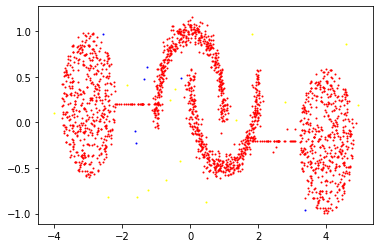

1985


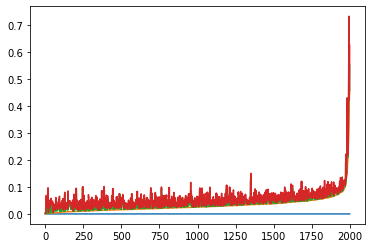

In [292]:
#improting necessary libraries
#preprocessing the data
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pickle
data = open("dbscan2000.pkl","rb")
arr = pickle.load(data)
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(arr)
distances, indices = nbrs.kneighbors(arr)
arr = arr.tolist()
distances = distances.tolist()
dct1 = {}
dct2 = {}
new_arr = []
for i in range(2000):
    dct1[i+1] = arr[i]
    dct2[i+1] = distances[i]
distances.sort()
key_list = list(dct2.keys()) 
val_list = list(dct2.values())
for i in distances:
    new_arr.append(dct1[key_list[val_list.index(i)]])


In [ ]:
#classifying the points as core, border, noise
epsilon = 0.18
minpts = 4
point_class = [0]*2000
for i in range(2000):
    if (distances[i][3] <= epsilon):
        point_class[i] = 1
    elif (distances[i][1] > epsilon):
        point_class[i] = 3
    else:
        point_class[i] = 2
for i in range(2000):
    if (point_class[i] == 1):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='red',label='core')
    if (point_class[i] == 2):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='blue',label='border')
    if (point_class[i] == 3):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='yellow',label='noise')
plt.show()
new_arr = new_arr[:-15]
print(len(new_arr))
b = len(new_arr) 
plt.plot(distances)
plt.show()

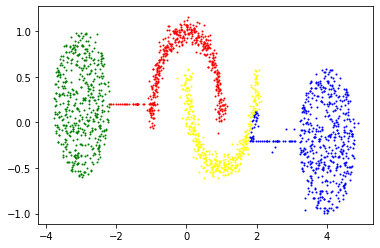

In [291]:
#clustering using the euclidean distance
from sklearn.metrics.pairwise import euclidean_distances
euclidean_mat = euclidean_distances(new_arr, new_arr)
point_class_noise = point_class[:-15]
point_class_arr = np.array(point_class_noise)
check = [0]*b
cluster = [0]*b
for i in range(b):
    core_points = []
    if(point_class_noise[i] == 1):
            a = np.where((euclidean_mat[i] <= epsilon) == True)
            for j in a[0]:
                if(point_class_noise[j] == 1):
                    if(cluster[j] == 0):
                        cluster[j] = i+1
                    core_points.append(cluster[j])
            for j in a[0]:
                if(point_class_noise[j] == 1):
                    cluster[j] = min(core_points)
for i in range(b):
    core_points = []
    if(point_class_noise[i] == 2):
        a = np.where((euclidean_mat[i] <= epsilon) == True)
        for j in a[0]:
            if(point_class_noise[j] == 1):
                core_points.append(cluster[j])
        if(core_points != []):
            cluster[i] = min(core_points)
for i in range(b):
    if (cluster[i] == 1):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='red',label='core')
    if (cluster[i] == 3):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='blue',label='border')
    if (cluster[i] == 7):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='yellow',label='noise')
    if (cluster[i] == 27):
        plt.scatter(new_arr[i][0],new_arr[i][1],s=1,c='green',label='core')
    